In [25]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('Fifa_world_cup_matches.csv', encoding='latin-1', sep=',')
df

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,...,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,...,0,0,7,14,0,0,75,72,288,277


In [27]:
# Seleccionar solo las columnas necesarias
columnas_necesarias = [
    'team1', 'team2', 'possession team1', 'possession team2', 'possession in contest',
    'number of goals team1', 'number of goals team2', 'date', 'hour', 'category',
    'total attempts team1', 'total attempts team2'
]

df = df[columnas_necesarias]

# Ahora df contendrá solo las columnas especificadas
df

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,total attempts team1,total attempts team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,5,6
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,13,8
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,14,9
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,6,7
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,14,9
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,10,12
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,14,13
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,14,7


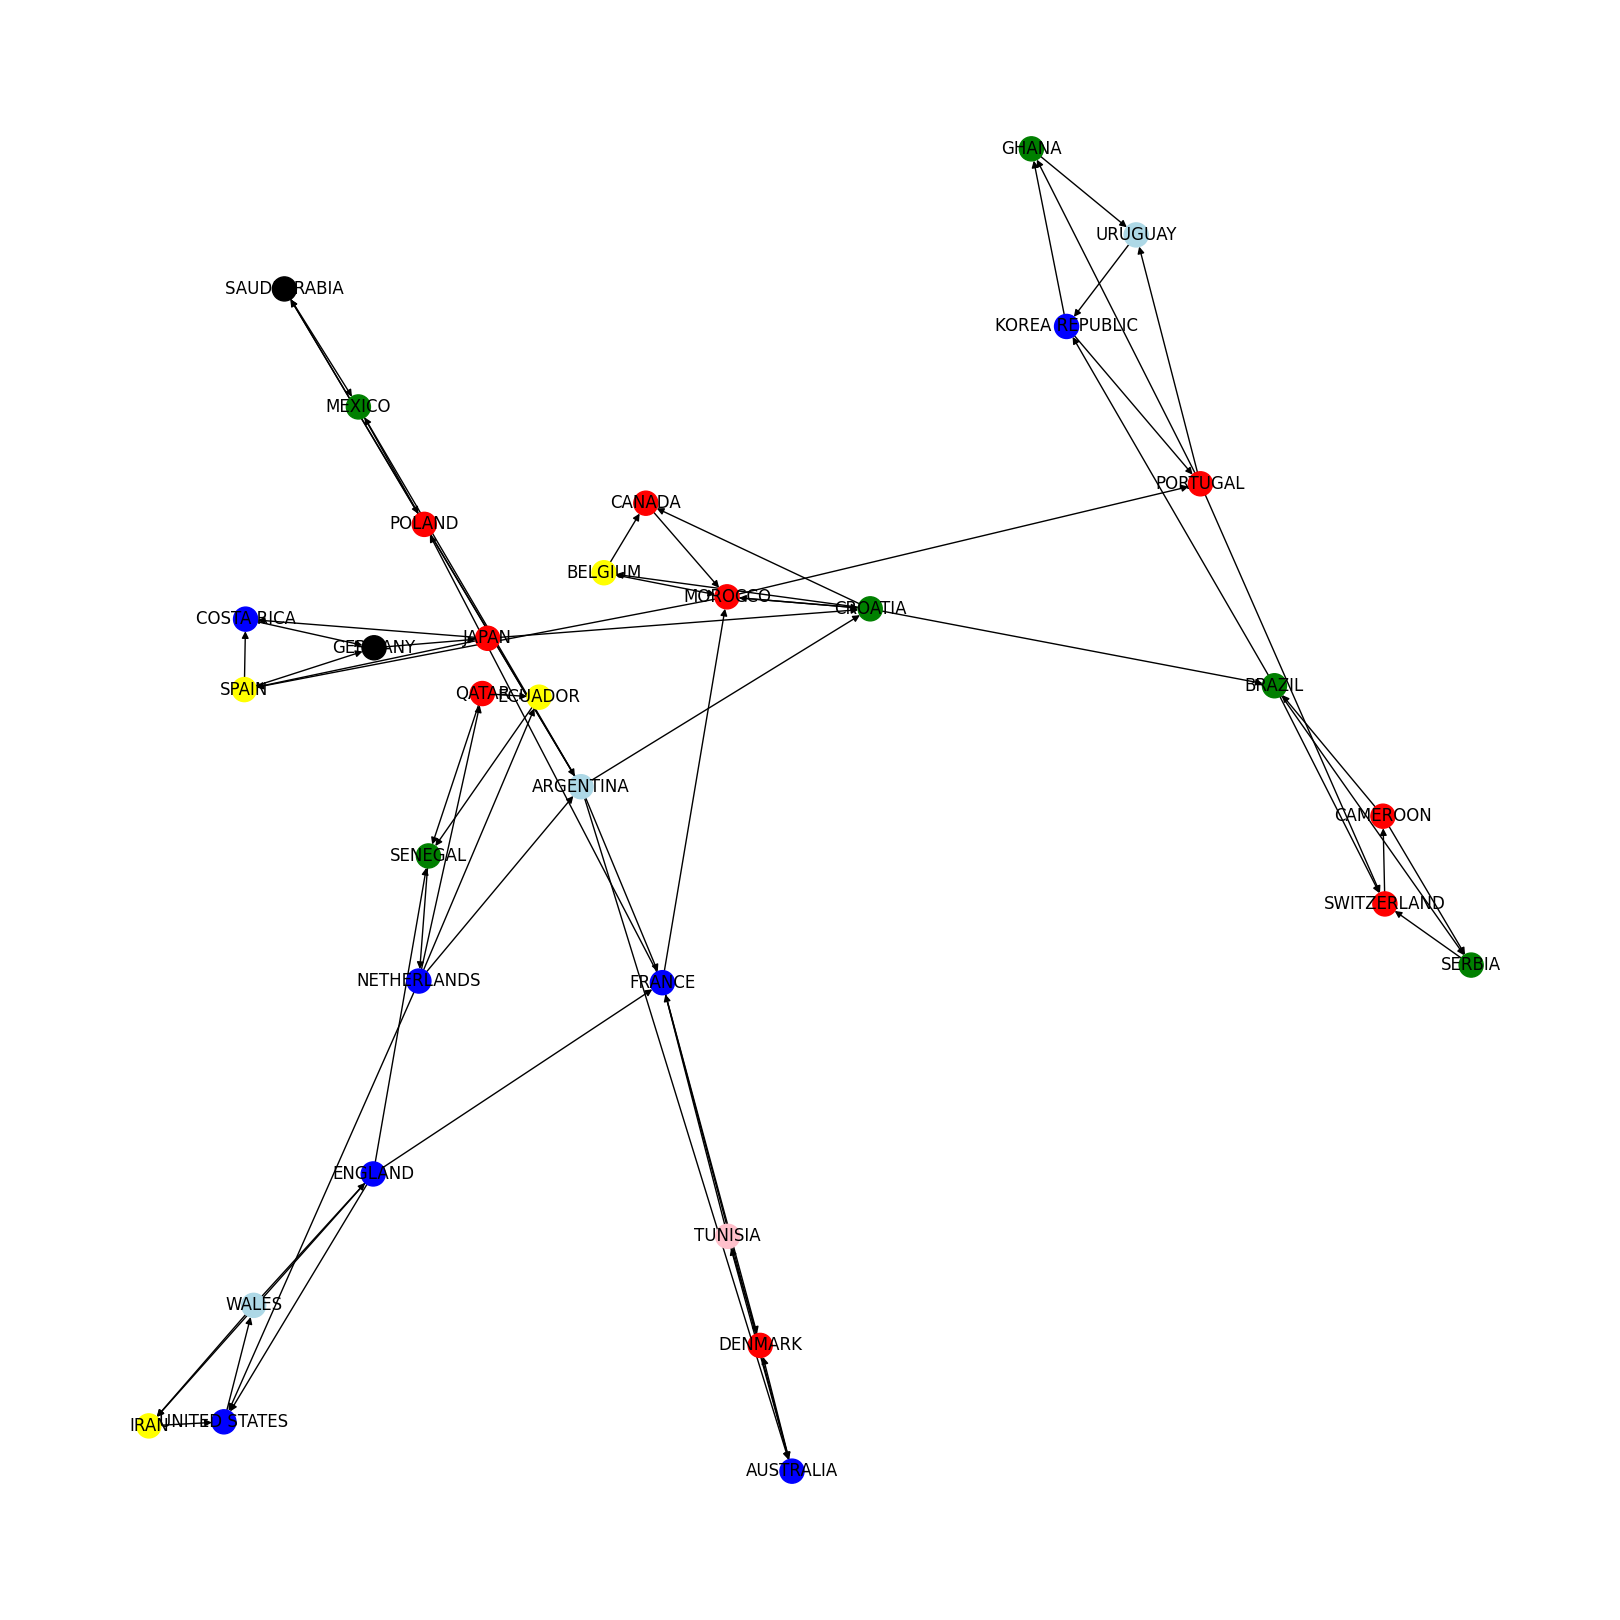

In [28]:
# Crear un grafo dirigido
fixture_mundial = nx.DiGraph()

# Obtener la lista de todos los equipos únicos
equipos_unicos = set(df['team1']).union(set(df['team2']))

# Crear un diccionario para asignar colores específicos a cada equipo
color_dict = {
    'GHANA': 'green',
    'URUGUAY': 'lightblue',
    'KOREA REPUBLIC': 'blue',
    'ARGENTINA': 'lightblue',
    'UNITED STATES': 'blue',
    'AUSTRALIA': 'blue',
    'PORTUGAL': 'red',
    'BRAZIL': 'green',
    'CAMEROON': 'red',
    'SWITZERLAND': 'red',
    'SERBIA': 'green',
    'QATAR': 'red',
    'DENMARK': 'red',
    'TUNISIA': 'pink',
    'CROATIA':'green',
    'MOROCCO':'red',
    'BELGIUM':'yellow',
    'CANADA':'red',
    'FRANCE': 'blue',
    'ECUADOR': 'yellow',
    'SENEGAL': 'green',
    'NETHERLANDS': 'blue',
    'ENGLAND': 'blue',
    'WALES': 'lightblue',
    'IRAN': 'yellow',
    'JAPAN': 'red',
    'GERMANY': 'black',
    'COSTA RICA': 'blue',
    'SPAIN': 'yellow',
    'POLAND': 'red',
    'MEXICO': 'green',
    'SAUDI ARABIA': 'black'
    # Agregar más equipos y colores según sea necesario
}

# Iterar a través de las filas del DataFrame y agregar nodos y aristas al grafo
for index, row in df.iterrows():
    equipo1 = row['team1']
    equipo2 = row['team2']
    
    # Agregar nodos si no existen
    fixture_mundial.add_node(equipo1)
    fixture_mundial.add_node(equipo2)
    
    # Agregar una arista que representa el partido
    fixture_mundial.add_edge(equipo1, equipo2, date=row['date'], hour=row['hour'], category=row['category'])
    
    # Para acceder a los atributos de la arista entre equipo1 y equipo2:
    attributes = fixture_mundial.get_edge_data(equipo1, equipo2)
    fecha = attributes['date']
    hora = attributes['hour']

# Calcular la disposición de los nodos
pos = nx.spring_layout(fixture_mundial, seed=42)

# Asignar colores aleatorios a los nodos
node_colors = [color_dict[nodo] for nodo in fixture_mundial.nodes]

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 16))  # Cambia el tamaño según tus preferencias

# Visualizar el grafo con nodos de colores aleatorios
nx.draw(fixture_mundial, pos, with_labels=True, node_color=node_colors)
plt.show()